In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ternary
import matplotlib.pyplot as plt
from cmcrameri import cm
import ScientificColourMaps8 as SCM8
from scipy.stats import norm
from scipy.interpolate import interp1d
from math import pi
import random
from random import randint
import warnings
warnings.filterwarnings('ignore')

In [2]:
from Ti_dynamo_code import *

# Figure S1

The following code generates Ti-rich diapirs with a mean radius of 40 km and a standard deviation of 1, 10, 20 and 40.  The distribution is one-tailed so that the maximum diapir radius cannot exceed 40 km.  Both histograms and cumulative distributions of the resulting diapir distribution are shown in the figure.

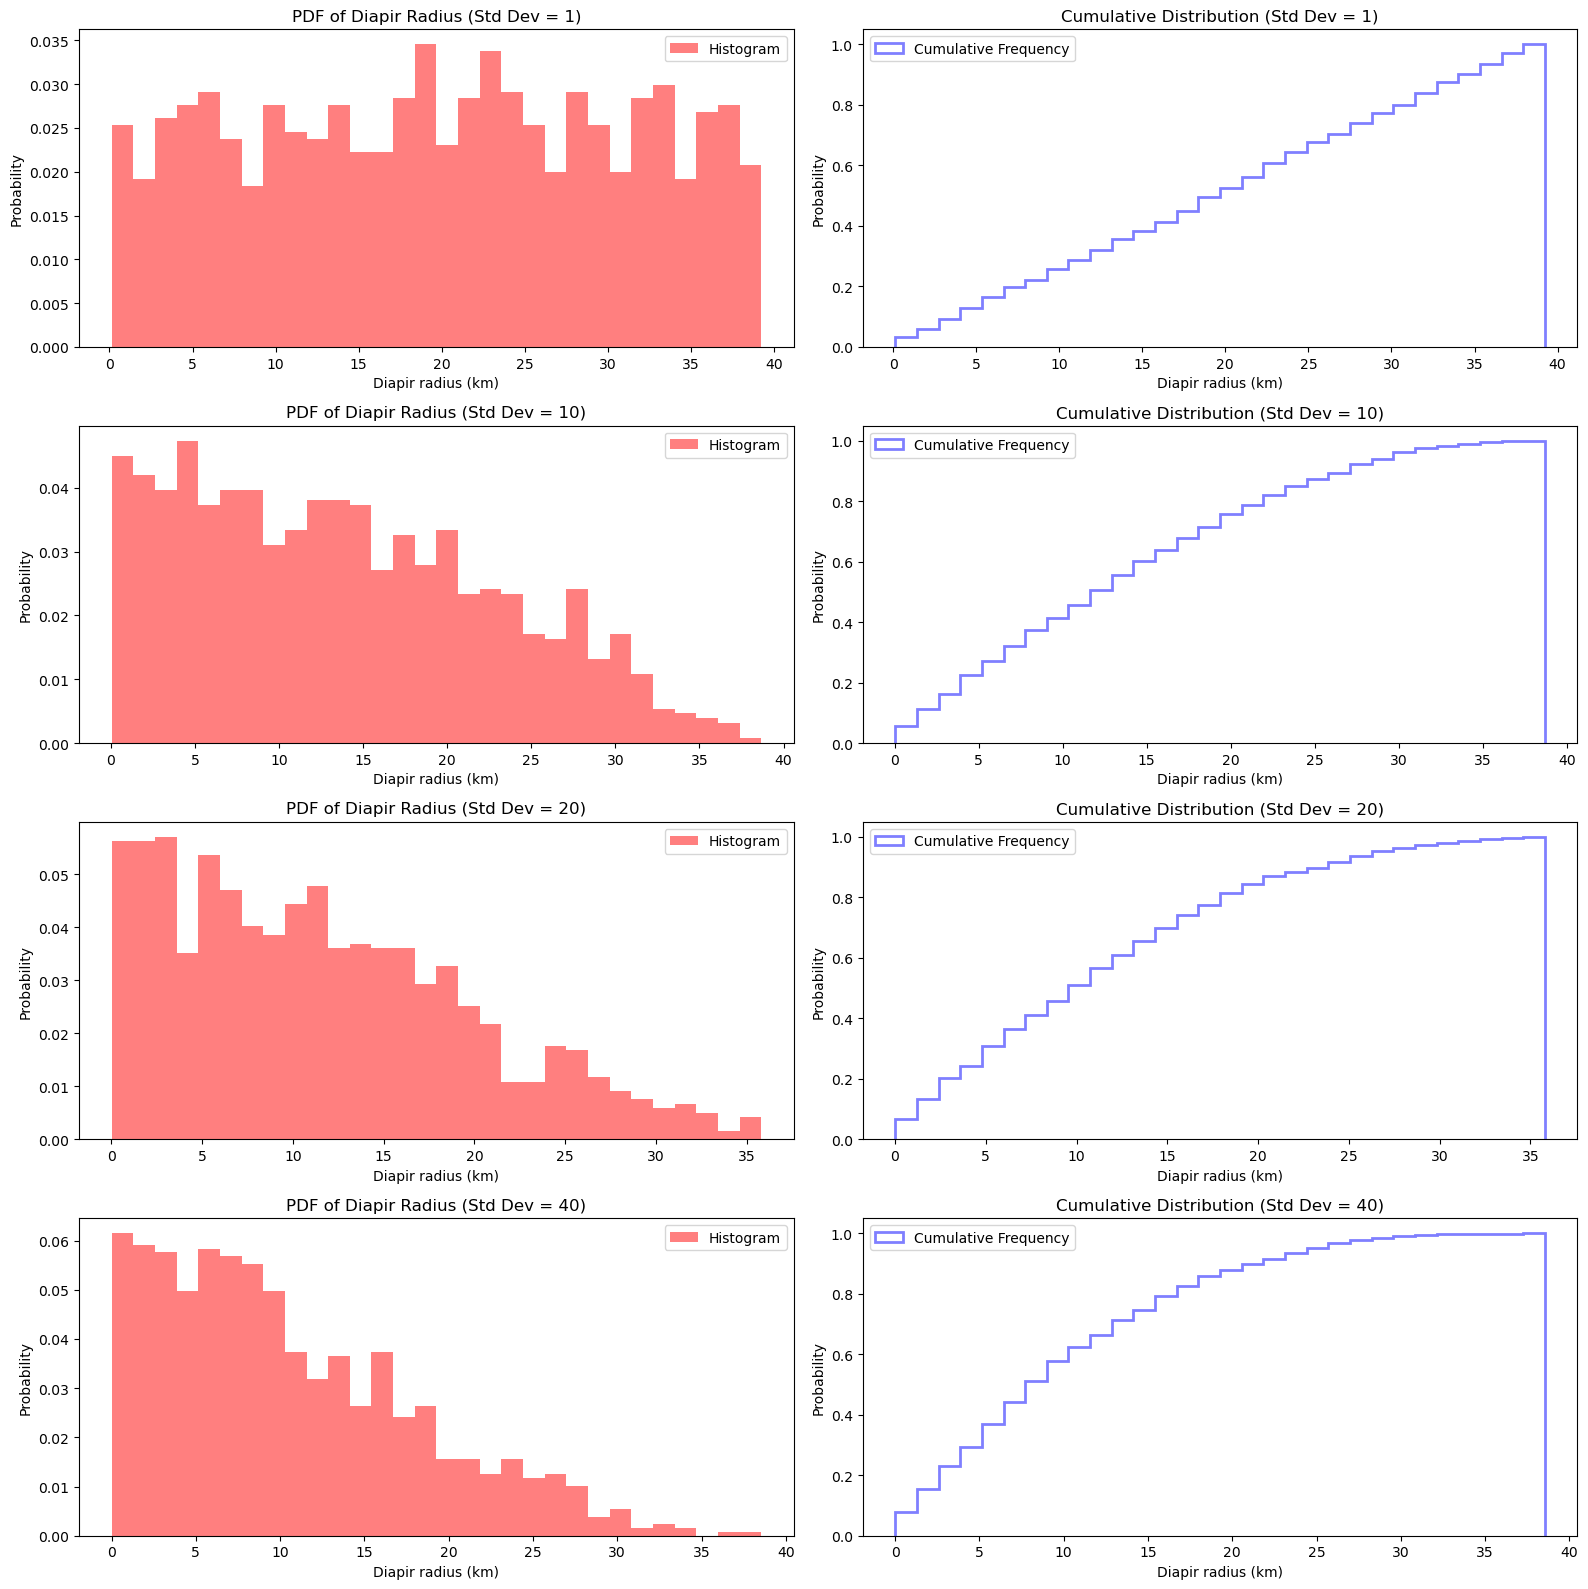

In [3]:
# Standard deviation values to use
std_devs = [1, 10, 20, 40]

# Create a 4x2 figure (8 subplots in total)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))

for i, std_dev in enumerate(std_devs):
    # Generate CDF for the given std deviation
    d = Diapir(10,std_dev)
    x, cdf = d.diapir_size()

    # Randomly sample from the distribution
    num_samples = 1000
    x_samples = np.random.uniform(0, 1, num_samples)
    interp_cdf = interp1d(cdf, x)
    sampled_diapir_size = interp_cdf(x_samples)

    # Plot the histogram of sampled diapir sizes on the left panel of the current row
    ax1 = axes[i, 0]
    ax1.hist(sampled_diapir_size, bins=30, color='red', alpha=0.5, density=True, label='Histogram')
    ax1.set_xlabel('Diapir radius (km)')
    ax1.set_ylabel('Probability')
    ax1.set_title(f'PDF of Diapir Radius (Std Dev = {std_dev})')
    ax1.legend()

    # Plot the cumulative frequency on the right panel of the current row
    ax2 = axes[i, 1]
    ax2.hist(sampled_diapir_size, bins=30, cumulative=True, color='blue', alpha=0.5, density=True, histtype='step', linewidth=2, label='Cumulative Frequency')
    ax2.set_xlabel('Diapir radius (km)')
    ax2.set_ylabel('Probability')
    ax2.set_title(f'Cumulative Distribution (Std Dev = {std_dev})')
    ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()

# Figure S2 

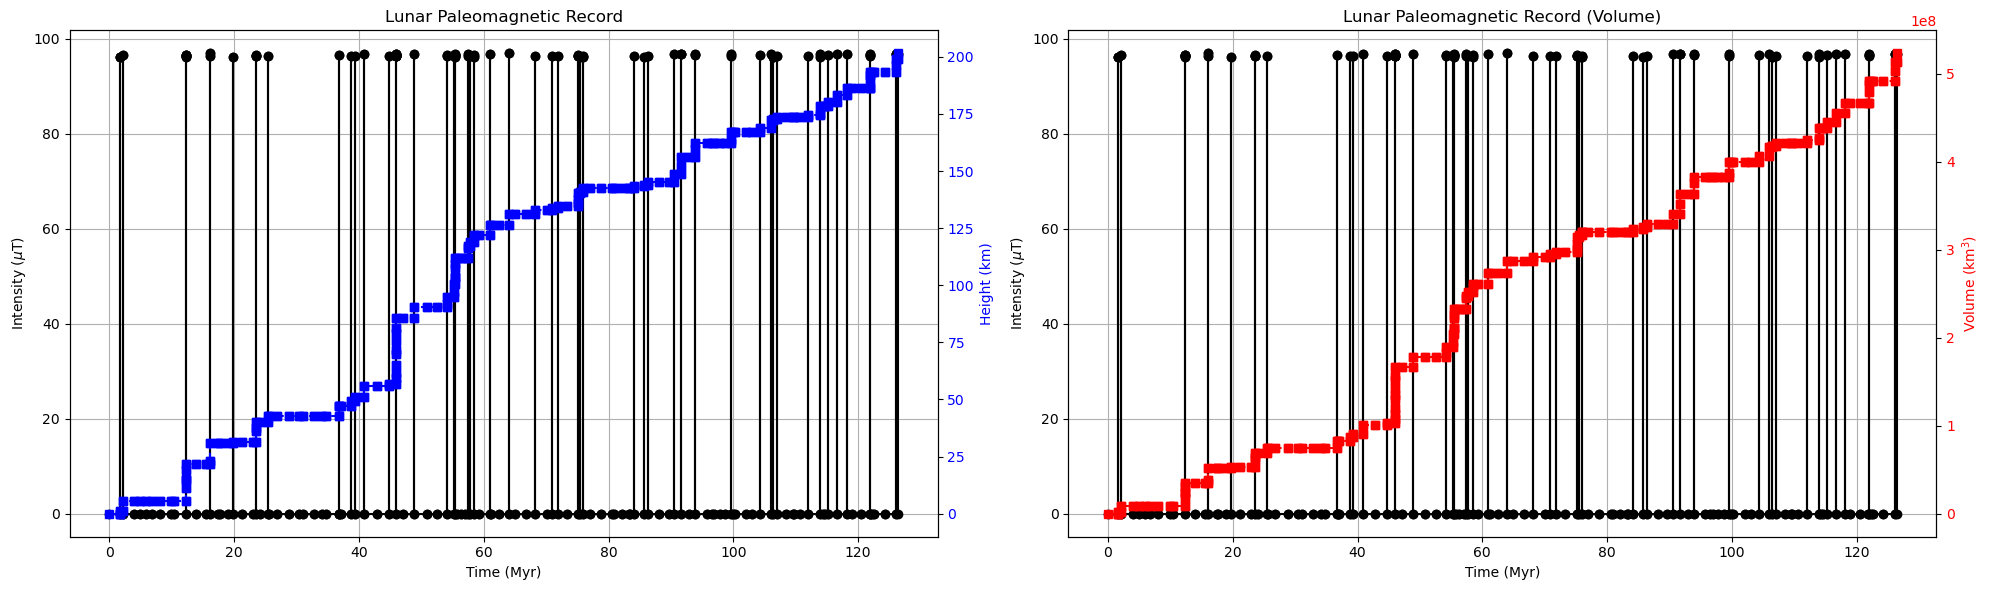

In [4]:
dynamo = DynamoGenerate(1000, 1000, 2000, 'height',constant = 0.001)
dynamo.plot_int_vs_time()

# Figure S3

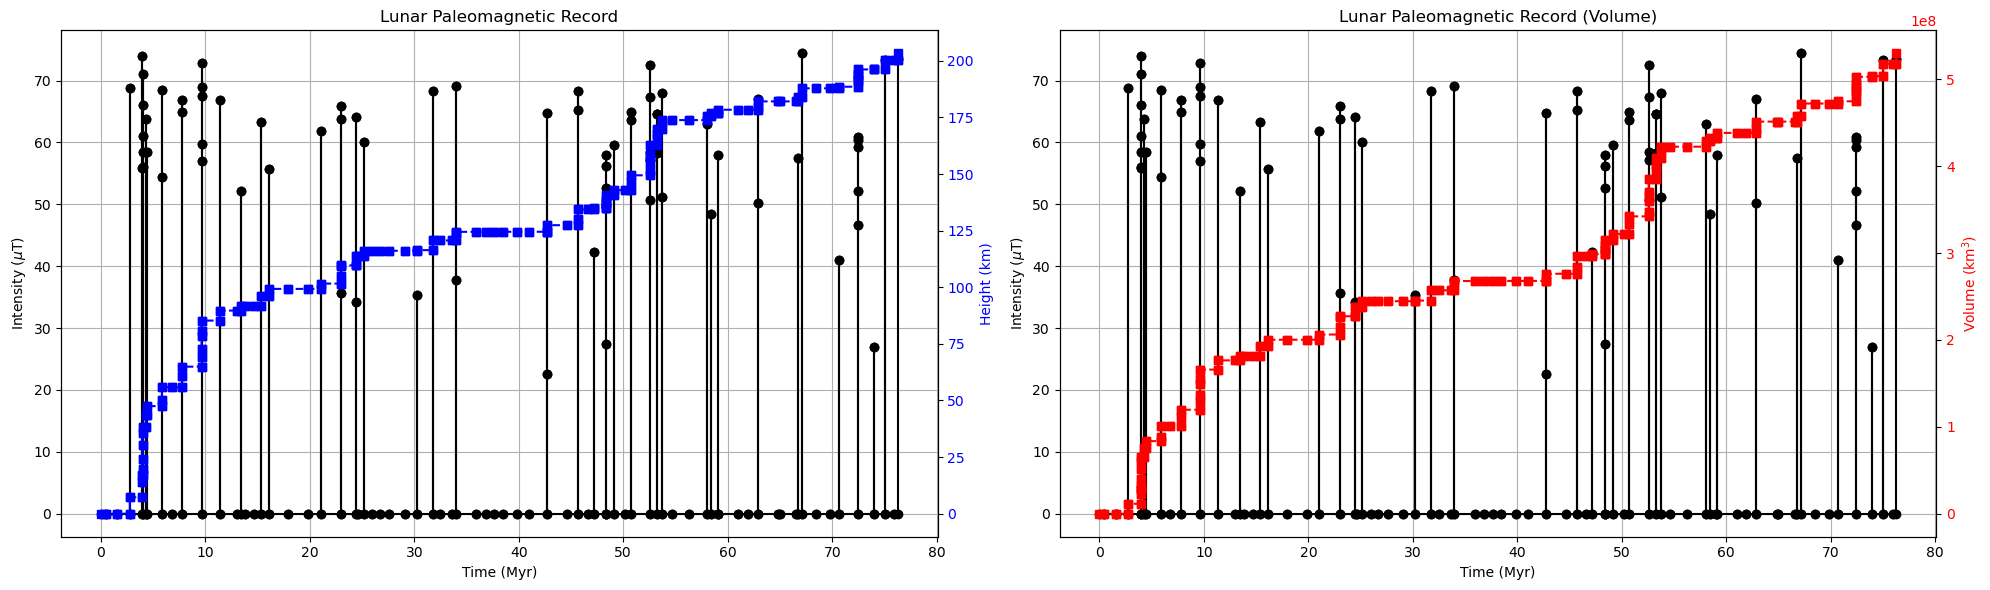

In [5]:
dynamo = DynamoGenerate(1000, 1000, 2000, 'volume',constant = 1e-7)
dynamo.plot_int_vs_time(save = "volume_simulated_dynamo_record")

# Figure S4

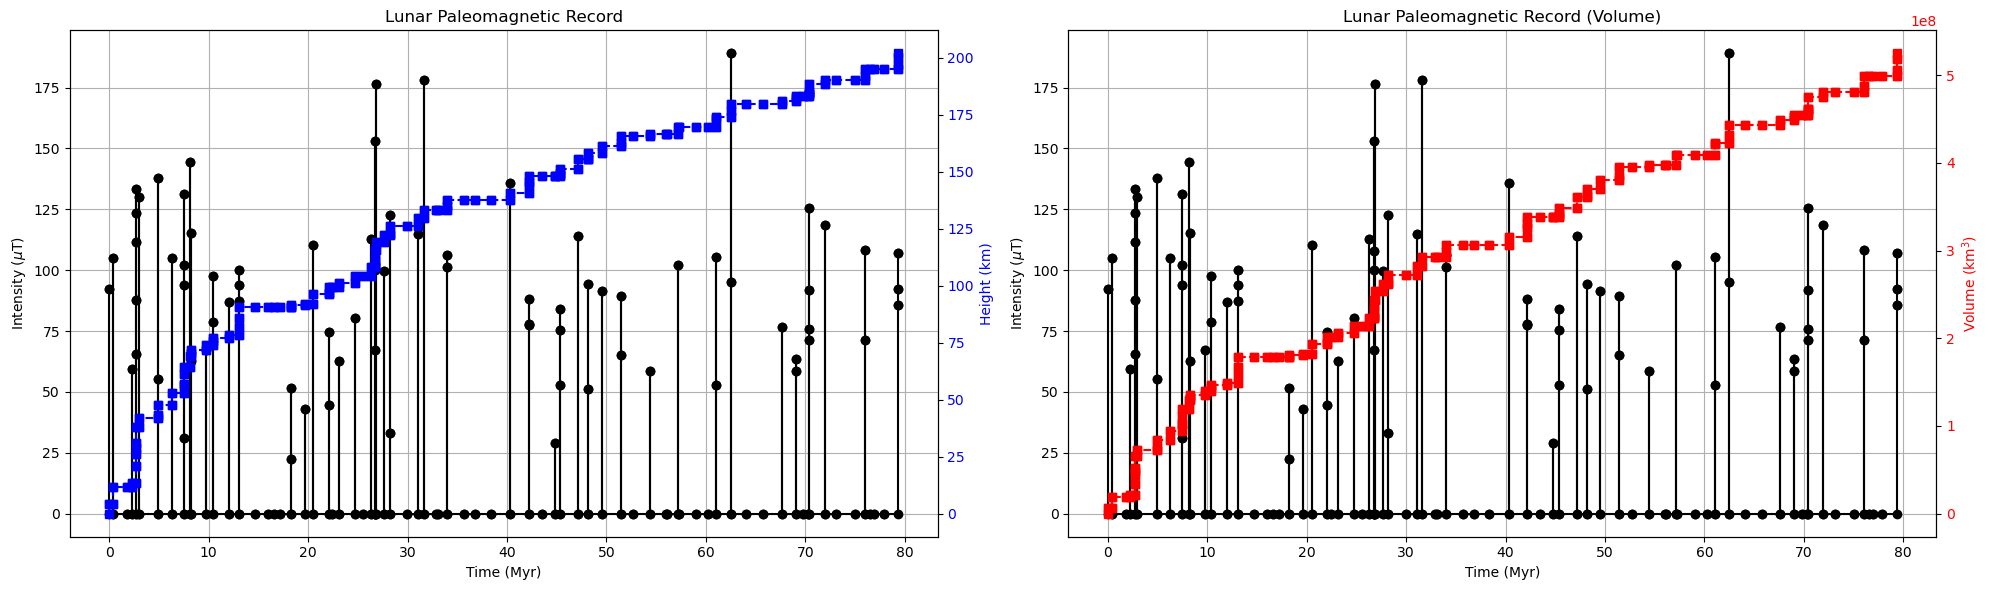

In [6]:
dynamo = DynamoGenerate(1000, 1000, 2000, 'independent',tOn = 0.001)
dynamo.plot_int_vs_time()

# Figure S5

Load in the pre-calculated data for each melting scenario

In [7]:
# Load the data
#Melting Scenario 1
height_prop = pd.read_csv("Height_loop_output.csv")
height_para = pd.read_csv("Height_loop_parameters.csv")
#Melting Scenario 2
volume_prop = pd.read_csv("Volume_loop_output.csv")
volume_para = pd.read_csv("Volume_loop_parameters.csv")
#Melting Scenario 3
independent_prop = pd.read_csv("Independent_loop_output.csv")
independent_para = pd.read_csv("Independent_loop_parameters.csv")

If you want to run these yourself, use the following code (note, these take several hours to run!)

```
#For melting scenario 1
method = 'height'
maxD_values = np.logspace(1,4,10)
tOff_values = np.linspace(1000,10000,10)
constant_values = np.linspace(0.005,0.01,10)
sdD_values = np.linspace(1,40,5)

#For melting scenario 2
method = 'volume'
maxD_values = np.logspace(1,4,10)
tOff_values = np.linspace(1000,4000,10)
constant_values = np.linspace(1e-8,1e-6,10)
sdD_values = np.linspace(1,40,5)

#For melting scenario 3
method = 'independent'
maxD_values = np.logspace(1,4,10)
tOff_values = np.logspace(2,4,10)
tOn_values = np.logspace(-4,1,20)
sdD_values = np.linspace(1,40,5)

properties_list = dynamo.loop_dynamo(
    method,
    maxD_values, 
    tOff_values, 
    sdD_values,
    tOn_values = tOn_values,
    save_output = True,
    outfile_name = "Volume_loop_output.csv"
)

parameters_list = dynamo.loop_dynamo_parameters(
    method,
    maxD_values, 
    tOff_values, 
    sdD_values,
    tOn_values = tOn_values,
    save_output = True,
    outfile_name = "Volume_loop_parameters.csv"
)
```

Now we can plot all dynamo model output results to see if they fulfil the four criteria: total intermittent duration, maximum field strength, melting time and percentage of time the intermittent dynamo is active for.

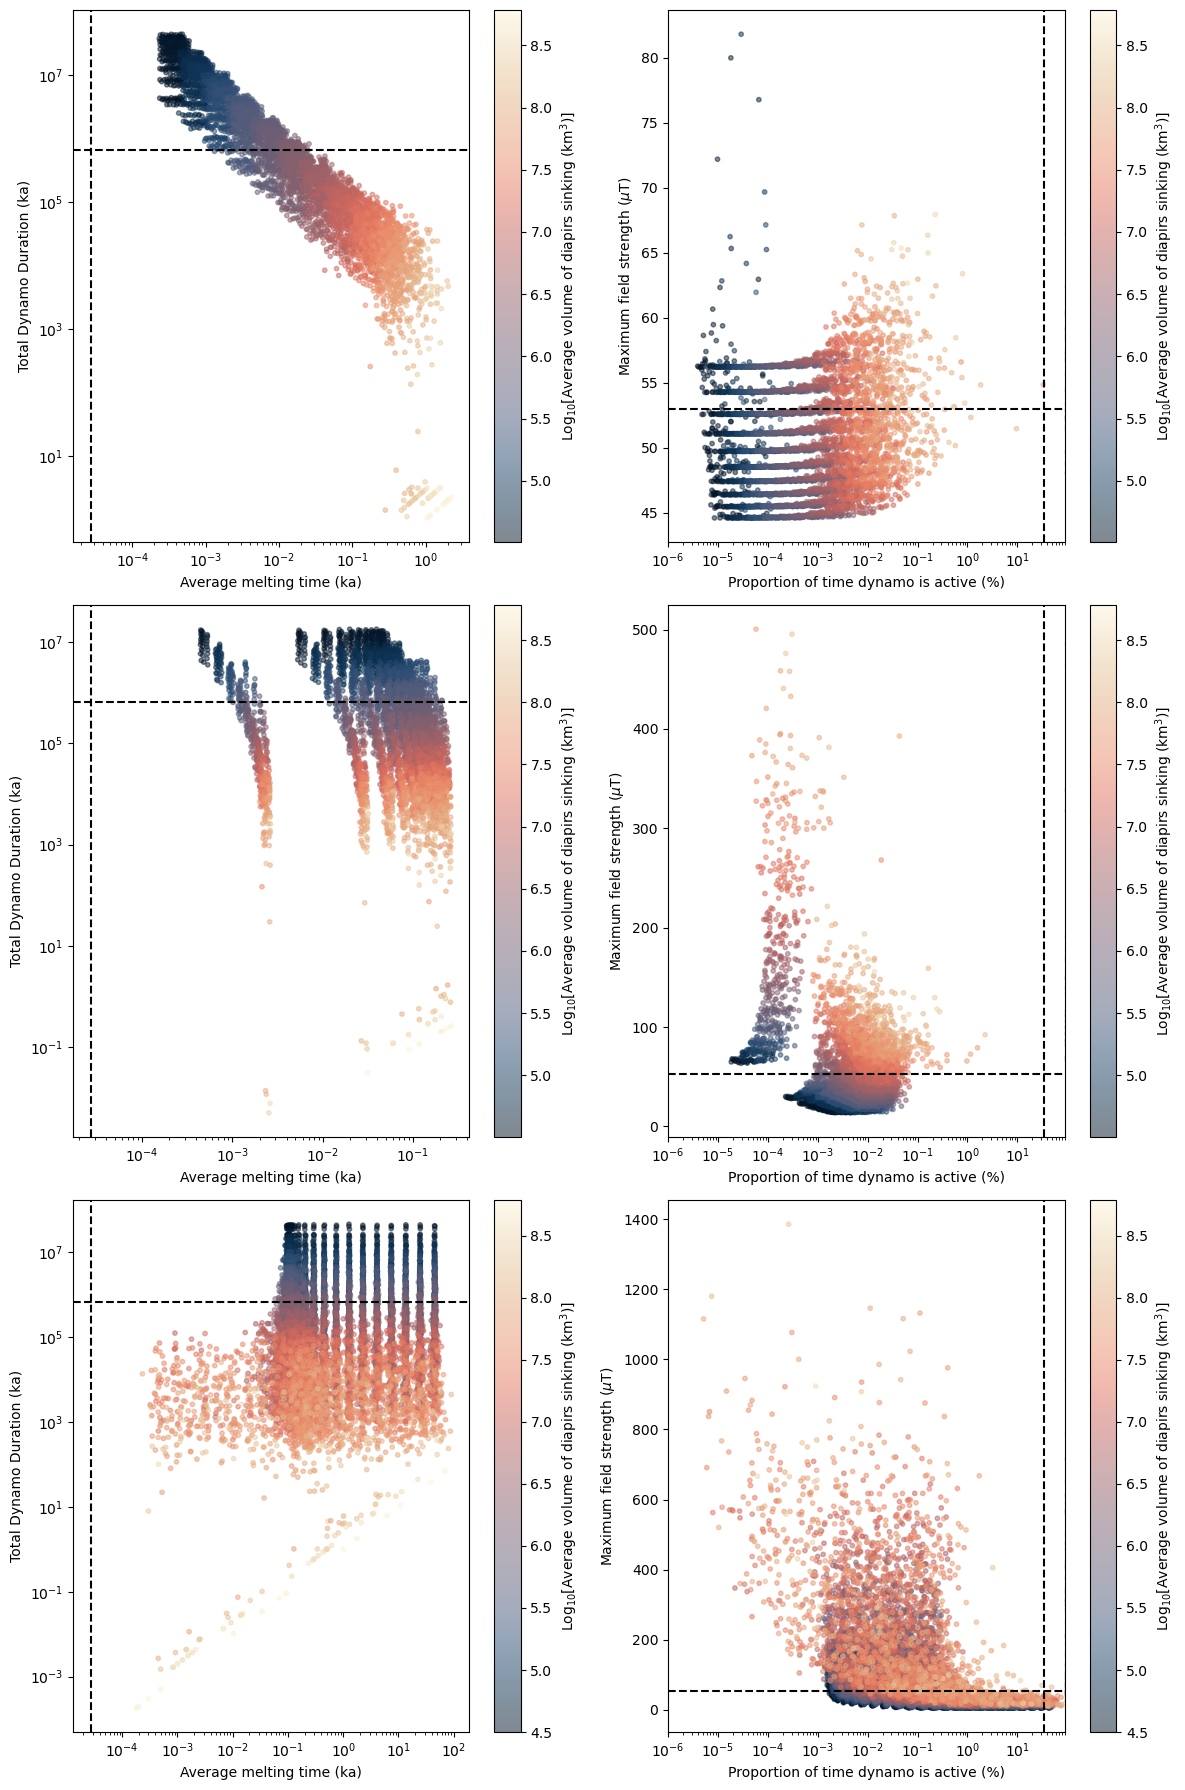

In [8]:
# Set the figsize to have a 1:1 aspect ratio for each plot
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Top Row: Height Properties
# Plot 1 (top-left)
scatter1 = axes[0, 0].scatter(height_prop['av_melt'], 
                              height_prop['total_on'], 
                              s=10, 
                              c=np.log10(height_prop['av_vol']), 
                              cmap=SCM8.lipari, 
                              alpha=0.5)
axes[0, 0].axhline(y=0.664e6, color='black', linestyle='--')
axes[0, 0].axvline(x=2.7e-5, color='black', linestyle='--')
axes[0, 0].set_xlabel('Average melting time (ka)')
axes[0, 0].set_ylabel('Total Dynamo Duration (ka)')
axes[0, 0].set_xscale('log')
axes[0, 0].set_yscale('log')

# Create a color bar for the first scatter plot
cbar1 = plt.colorbar(scatter1, ax=axes[0, 0])
cbar1.set_label('Log$_{10}$[Average volume of diapirs sinking (km$^3$)]')

# Plot 2 (top-right)
scatter2 = axes[0, 1].scatter(height_prop['percent_on'], 
                              height_prop['max_B'], 
                              s=10, 
                              c=np.log10(height_prop['av_vol']), 
                              cmap=SCM8.lipari, 
                              alpha=0.5)
axes[0, 1].axhline(y=53, color='black', linestyle='--')
axes[0, 1].axvline(x=35, color='black', linestyle='--')
axes[0, 1].set_xlabel('Proportion of time dynamo is active (%)')
axes[0, 1].set_ylabel('Maximum field strength ($\mu$T)')
axes[0, 1].set_xlim([1e-6, 90])
axes[0, 1].set_xscale('log')

# Create a color bar for the second scatter plot
cbar2 = plt.colorbar(scatter2, ax=axes[0, 1])
cbar2.set_label('Log$_{10}$[Average volume of diapirs sinking (km$^3$)]')

# Middle Row: Volume Properties (using same metrics as height_prop)
# Plot 3 (middle-left)
scatter3 = axes[1, 0].scatter(volume_prop['av_melt'], 
                              volume_prop['total_on'], 
                              s=10, 
                              c=np.log10(volume_prop['av_vol']), 
                              cmap=SCM8.lipari, 
                              alpha=0.5)
axes[1, 0].axhline(y=0.664e6, color='black', linestyle='--')
axes[1, 0].axvline(x=2.7e-5, color='black', linestyle='--')
axes[1, 0].set_xlabel('Average melting time (ka)')
axes[1, 0].set_ylabel('Total Dynamo Duration (ka)')
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')

# Create a color bar for the third scatter plot
cbar3 = plt.colorbar(scatter3, ax=axes[1, 0])
cbar3.set_label('Log$_{10}$[Average volume of diapirs sinking (km$^3$)]')

# Plot 4 (middle-right)
scatter4 = axes[1, 1].scatter(volume_prop['percent_on'], 
                              volume_prop['max_B'], 
                              s=10, 
                              c=np.log10(volume_prop['av_vol']), 
                              cmap=SCM8.lipari, 
                              alpha=0.5)
axes[1, 1].axhline(y=53, color='black', linestyle='--')
axes[1, 1].axvline(x=35, color='black', linestyle='--')
axes[1, 1].set_xlabel('Proportion of time dynamo is active (%)')
axes[1, 1].set_ylabel('Maximum field strength ($\mu$T)')
axes[1, 1].set_xlim([1e-6, 90])
axes[1, 1].set_xscale('log')

# Create a color bar for the fourth scatter plot
cbar4 = plt.colorbar(scatter4, ax=axes[1, 1])
cbar4.set_label('Log$_{10}$[Average volume of diapirs sinking (km$^3$)]')

# Bottom Row: Independent Properties (using same metrics as height_prop)
# Plot 5 (bottom-left)
scatter5 = axes[2, 0].scatter(independent_prop['av_melt'], 
                              independent_prop['total_on'], 
                              s=10, 
                              c=np.log10(independent_prop['av_vol']), 
                              cmap=SCM8.lipari, 
                              alpha=0.5)
axes[2, 0].axhline(y=0.664e6, color='black', linestyle='--')
axes[2, 0].axvline(x=2.7e-5, color='black', linestyle='--')
axes[2, 0].set_xlabel('Average melting time (ka)')
axes[2, 0].set_ylabel('Total Dynamo Duration (ka)')
axes[2, 0].set_xscale('log')
axes[2, 0].set_yscale('log')

# Create a color bar for the fifth scatter plot
cbar5 = plt.colorbar(scatter5, ax=axes[2, 0])
cbar5.set_label('Log$_{10}$[Average volume of diapirs sinking (km$^3$)]')

# Plot 6 (bottom-right)
scatter6 = axes[2, 1].scatter(independent_prop['percent_on'], 
                              independent_prop['max_B'], 
                              s=10, 
                              c=np.log10(independent_prop['av_vol']), 
                              cmap=SCM8.lipari, 
                              alpha=0.5)
axes[2, 1].axhline(y=53, color='black', linestyle='--')
axes[2, 1].axvline(x=35, color='black', linestyle='--')
axes[2, 1].set_xlabel('Proportion of time dynamo is active (%)')
axes[2, 1].set_ylabel('Maximum field strength ($\mu$T)')
axes[2, 1].set_xlim([1e-6, 90])
axes[2, 1].set_xscale('log')

# Create a color bar for the sixth scatter plot
cbar6 = plt.colorbar(scatter6, ax=axes[2, 1])
cbar6.set_label('Log$_{10}$[Average volume of diapirs sinking (km$^3$)]')

plt.tight_layout()
plt.show()

Next, we will plot the correlation matrices for all input and output parameters for the three melting scenarios.

In [9]:
# Combine the DataFrames side by side
height_comb = pd.concat([height_prop, height_para], axis=1)
volume_comb = pd.concat([volume_prop, volume_para], axis=1)
independent_comb = pd.concat([independent_prop, independent_para], axis=1)

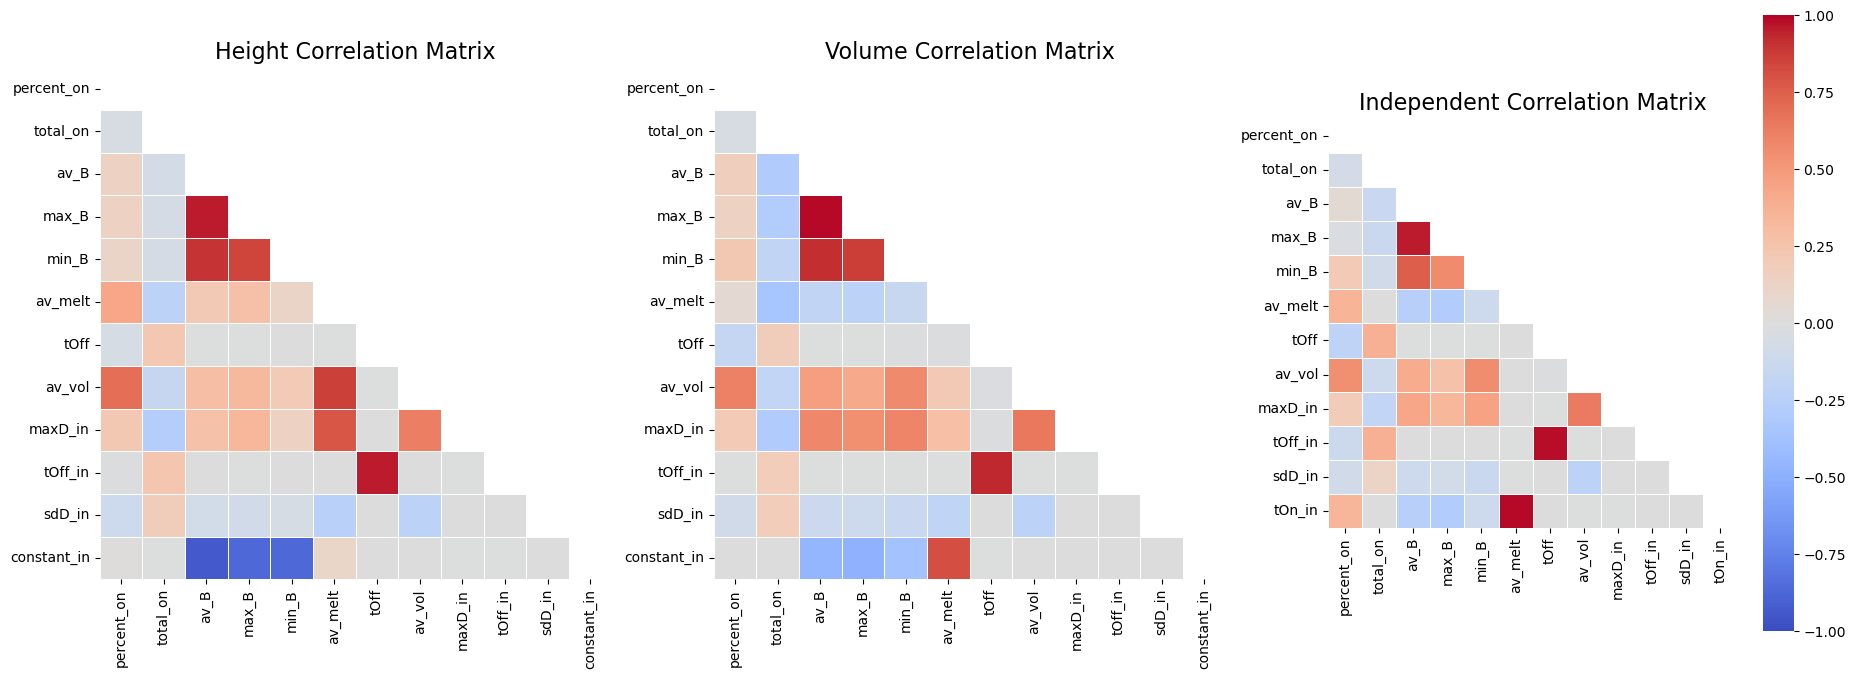

In [10]:
# Set up the matplotlib figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# List of the datasets
datasets = [height_comb, volume_comb, independent_comb]
titles = ['Height Correlation Matrix', 'Volume Correlation Matrix', 'Independent Correlation Matrix']

# Loop over the datasets and create a heatmap for each
for i, ax in enumerate(axes):
    # Calculate the correlation matrix
    corr_matrix = datasets[i].corr()
    
    # Generate a mask for the upper triangle (or lower triangle) of the matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Draw the heatmap with the mask
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, annot=False, ax=ax, cbar=(i == 2))

    # Set the title for each subplot
    ax.set_title(titles[i], fontsize=16)

# Adjust the position of the last heatmap to align with the colorbar
fig.subplots_adjust(right=0.85)

# Display the plot
plt.show()

# Figure S6

First, we generate a dynamo that is active for between 0-100% of the time in increments of 1%.  We then take 23 random samples from this dynamo (with a value of 1 where the dynamo is generating a field, and 0 during a gap between periods of field generation) 1000 times and calculate the mean and standard deviation proportion of the time the dynamo appears to be active.

In [11]:
# Lists to store values of val, prob, and standard deviation
val_list = []
prob_list = []
SD_list = []

# Loop through all values of val from 0 to 10000
for val in range(1001):  # 1001 to include 1000 (dividing val by 10 later)
    # Create dynamo_activity_list based on the current val
    dynamo_activity_list = []
    for x in range(1000):
        if x < val:
            dynamo = 1
        else:
            dynamo = 0
        dynamo_activity_list.append(dynamo)
    
    # Calculate the probability by simulation
    prob_temp_list = []
    for _ in range(1000):
        active_list = []
        for _ in range(23):  # 23 samples
            t = randint(0, 999)
            active_list.append(dynamo_activity_list[t])
        
        prob = np.sum(active_list) / 23 * 100  # Correcting division by 23 (number of samples)
        prob_temp_list.append(prob)
    
    # Calculate the mean probability for the current val
    mean_prob = np.mean(prob_temp_list)
    SD_prob = np.std(prob_temp_list)  # Corrected standard deviation calculation
    
    # Save the current val and the calculated mean_prob
    val_list.append(val / 10)  # Adjusting val for final scale
    prob_list.append(mean_prob)
    SD_list.append(SD_prob)

We can now create a plot of the amount of time the dynamo appears to be active from 23 samples, versus the amount of time the dynamo was actually active for.

Intersection of y = 35 with Fit Line: x = 35.02
Intersection of y = 35 with Upper Bound: x = 26.05
Intersection of y = 35 with Lower Bound: x = 45.70


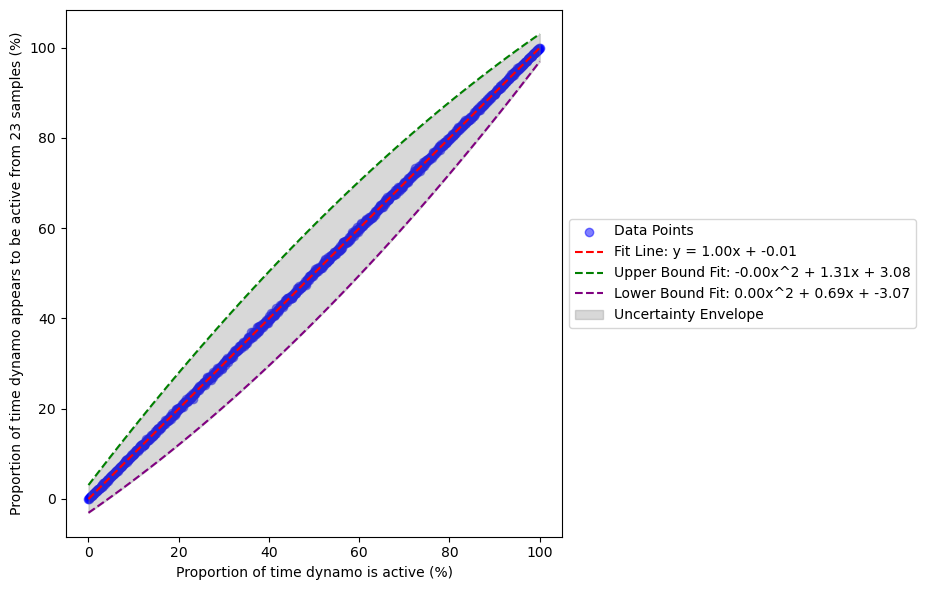

In [12]:
# Calculate the upper and lower bounds for the uncertainty envelope
upper_bound = np.array(prob_list) + np.array(SD_list)
lower_bound = np.array(prob_list) - np.array(SD_list)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(val_list, prob_list, color='blue', alpha=0.5, label='Data Points')

# Calculate the line of best fit
coefficients = np.polyfit(val_list, prob_list, 1)  # Fit a 1st degree polynomial (straight line)
slope, intercept = coefficients

# Create the line of best fit
x_fit = np.linspace(min(val_list), max(val_list), 100)
y_fit = slope * x_fit + intercept

# Plot the line of best fit
plt.plot(x_fit, y_fit, color='red', linestyle='--', label=f'Fit Line: y = {slope:.2f}x + {intercept:.2f}')

# Fit higher-degree polynomials to the upper and lower bounds of the uncertainty envelope
degree = 2  # Change this to a higher degree if needed
coefficients_upper = np.polyfit(val_list, upper_bound, degree)
coefficients_lower = np.polyfit(val_list, lower_bound, degree)

# Create the best fit curves for the uncertainty envelope
y_fit_upper = np.polyval(coefficients_upper, x_fit)
y_fit_lower = np.polyval(coefficients_lower, x_fit)

# Plot the best fit curves for the uncertainty envelope
plt.plot(x_fit, y_fit_upper, color='green', linestyle='--', label=f'Upper Bound Fit: {coefficients_upper[0]:.2f}x^2 + {coefficients_upper[1]:.2f}x + {coefficients_upper[2]:.2f}')
plt.plot(x_fit, y_fit_lower, color='purple', linestyle='--', label=f'Lower Bound Fit: {coefficients_lower[0]:.2f}x^2 + {coefficients_lower[1]:.2f}x + {coefficients_lower[2]:.2f}')

# Plot the uncertainty envelope
plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color='gray', alpha=0.3, label='Uncertainty Envelope')

# Add labels
plt.xlabel('Proportion of time dynamo is active (%)')
plt.ylabel('Proportion of time dynamo appears to be active from 23 samples (%)')

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')

# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Ensure everything fits within the figure area
plt.tight_layout()


# Interpolation to find x-values where y = 35
target_y = 35

# Interpolating for the line of best fit
x_cross_fit = np.interp(target_y, y_fit, x_fit)

# Interpolating for the upper and lower bounds
x_cross_upper = np.interp(target_y, y_fit_upper, x_fit)
x_cross_lower = np.interp(target_y, y_fit_lower, x_fit)

# Print the intersection points
print(f'Intersection of y = {target_y} with Fit Line: x = {x_cross_fit:.2f}')
print(f'Intersection of y = {target_y} with Upper Bound: x = {x_cross_upper:.2f}')
print(f'Intersection of y = {target_y} with Lower Bound: x = {x_cross_lower:.2f}')

# Show the plot
plt.show()